`Feature Engineering:`
- **One-hot Encoding**: 
    - Khi biến đầu vào là biến phân loại danh nghĩa (nominal variables) mà không có sự thứ bậc giữa các giá trị, ví dụ như biến "loại xe" có các giá trị "xe hơi", "xe máy", "xe đạp",...
    - Khi mô hình học máy của bạn không thể xử lý các biến phân loại trực tiếp mà cần biến chúng thành dạng số.
- **Z-score**:
    - Khi giá trị của các biến có phân phối chuẩn (normal distribution) hoặc gần với phân phối chuẩn.
    - Khi các thuộc tính có đơn vị đo khác nhau và cần chuẩn hóa chúng về cùng một tỷ lệ.
    - Khi mô hình học máy sử dụng các thuật toán như K-Means, SVM, logistic regression và neural networks vì chúng yêu cầu dữ liệu có phân phối chuẩn.
- **Min-max scaling**:
    - Khi bạn cần chuyển đổi các giá trị của biến thành khoảng giá trị nhất định, thường là [0, 1] hoặc [-1, 1].
    - Khi phân phối của biến không đồng nhất và các giá trị có thể nằm ngoài phạm vi của các phép biến đổi khác.
    - Khi mô hình học máy của bạn sử dụng các thuật toán như Neural Networks và Deep Learning vì chúng yêu cầu dữ liệu được chia tỷ lệ vào khoảng giá trị nhất định.

## `Phân cụm sử dụng thuật toán K-Means Clustering để tìm ra các phân khúc khách hàng`

<img src="./Colorful Handwritten About Me Blank Education Presentation.gif">

Phân tích tính cách khách hàng giúp doanh nghiệp điều chỉnh sản phẩm của mình dựa trên các khách hàng mục tiêu thuộc các loại phân khúc khách hàng khác nhau. Ví dụ: thay vì chi tiền để tiếp thị sản phẩm mới tới mọi khách hàng trong cơ sở dữ liệu của công ty, công ty có thể phân tích phân khúc khách hàng nào có nhiều khả năng mua sản phẩm nhất và sau đó chỉ tiếp thị sản phẩm trên phân khúc cụ thể đó.

Phần quan trọng nhất của phân tích tính cách khách hàng là tìm ra câu trả lời cho các câu hỏi như: 
- Mọi người nói gì về sản phẩm đó: điều gì mang lại thái độ của khách hàng đối với sản phẩm. 
- Mọi người làm gì: tiết lộ những gì mọi người đang làm hơn là những gì họ đang nói về sản phẩm của bạn.

Trong Project này, chúng ta sẽ thực hiện một kỹ thuật học máy thuộc lớp không giám sát (Unsupervised learning) - Clustering. Kỹ thuật sử dụng sẽ là kỹ thuật phân cụm không phân cấp, cụ thể là sử dụng thuật toán K-Means

## 1, Nhập thư viện và dữ liệu

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import silhouette_score
import warnings
import sys

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./marketing_campaign.csv', sep='\t')

In [2]:
"""df['Education_Label'].unique()

edu_le = LabelEncoder()
edu_labels = edu_le.fit_transform(df['Education'])
df['Education_Label'] = edu_labels
df[['Education', 'Education_Label']].head(10)

list(edu_le.classes_)

edu_ohe = OneHotEncoder()
edu_feature_arr = edu_ohe.fit_transform(df[['Education_Label']]).toarray()
edu_feature_labels = list(edu_le.classes_)
edu_features = pd.DataFrame(edu_feature_arr, columns=edu_feature_labels)"""

"df['Education_Label'].unique()\n\nedu_le = LabelEncoder()\nedu_labels = edu_le.fit_transform(df['Education'])\ndf['Education_Label'] = edu_labels\ndf[['Education', 'Education_Label']].head(10)\n\nlist(edu_le.classes_)\n\nedu_ohe = OneHotEncoder()\nedu_feature_arr = edu_ohe.fit_transform(df[['Education_Label']]).toarray()\nedu_feature_labels = list(edu_le.classes_)\nedu_features = pd.DataFrame(edu_feature_arr, columns=edu_feature_labels)"

## 2, Thông tin tổng quan của dữ liệu

### 2.1 Thông tin tổng quan

In [3]:
""" Số dòng và số cột của dữ liệu """
print("Số dòng và cột của dữ liệu:", df.shape)

Số dòng và cột của dữ liệu: (2240, 29)


In [4]:
"""Tên các cột của dữ liệu"""
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

<img src = "./image_columns.png">

Trong đó, gồm các thành phần chính sau:
- Thông tin khách hàng: 10 cột
    - ID: Mã định danh
    - Year_Birth: Năm sinh
    - Education: Trình độ học vấn
    - Marital_Status: Tình trạng hôn nhân
    - Income: Thu nhập hàng năm của hộ gia đình khách hàng
    - Kidhome: Số trẻ em trong hộ gia đình
    - Teenhome: Số thanh thiếu niên trong hộ gia đình
    - Dt_Customer: Ngày khách hàng bắt đầu sử dụng dịch vụ/sản phẩm của công ty
    - Recency: Số ngày kể từ lần mua hàng cuối cùng của khách hàng
    - Complain: Có hai giá trị: 1 nếu khách hàng có phàn nàn trong 2 năm qua, 0 nếu ngược lại

- Sản phẩm: 6 cột
    - MntWines: Số tiền chi cho rượu vang trong 2 năm qua
    - MntFruits: Số tiền chi cho trái cây trong 2 năm qua
    - MntMeatProducts: Số tiền chi cho thịt trong 2 năm qua
    - MntFishProducts: Số tiền chi cho cá trong 2 năm qua
    - MntSweetProducts: Số tiền chi cho đồ ngọt trong 2 năm qua
    - MntGoldProds: Số tiền chi cho vàng trong 2 năm qua

- Khuyến mãi: (Promotion) 7 cột
    - NumDealsPurchases: Số lần mua hàng được giảm giá
    - AcceptedCmp1: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch thứ 1, 0 nếu ngược lại
    - AcceptedCmp2: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch thứ 2, 0 nếu ngược lại
    - AcceptedCmp3: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch thứ 3, 0 nếu ngược lại
    - AcceptedCmp4: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch thứ 4, 0 nếu ngược lại
    - AcceptedCmp5: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch thứ 5, 0 nếu ngược lại
    - Response: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch trước, 0 nếu ngược lại

- Place: 4 cột
    - NumWebPurchases: Số lần KH mua hàng qua trang web của công ty
    - NumCatalogPurchases: Số lần mua hàng được thực hiện bằng danh mục
    - NumStorePurchases: Số lần mua hàng trực tiếp ở cửa hàng
    - NumWebVisitsMonth: Số lượng truy cập vào website của công ty trong tháng qua

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

`Nhận xét:`
- Trường Income có nulls với 2216/2240 dòng
- Trường Dt_customer chứa dữ liệu về ngày (date) mà khách hàng được đưa vào trong CSDL nhưng không có kiểu dữ liệu datetime mà là object
- Có một số đặc trưng (features) thuộc loại đặc trưng phân loại (categorical features), có thể nhận biết bằng kiểu dữ liệu dtype=object như **Education** và **Marital_Status**. Chúng ta sẽ cần mã hóa (encoding) chúng về dạng số

In [6]:
"""Xóa các dòng có giá trị trống"""
df = df.dropna()
print("Số dòng và cột của dữ liệu sau khi xóa các dòng có giá trị trống:", df.shape)

Số dòng và cột của dữ liệu sau khi xóa các dòng có giá trị trống: (2216, 29)


### 2.2 Xem xét các cột trong bộ dữ liệu

#### 2.2.1 ID

In [7]:
# Xóa cột 'ID' vì không cần thiết
df = df.drop(columns=['ID'])

#### 2.2.2 Year_Birth

In [8]:
# Tính toán thời gian gần đây nhất một KH được thêm vào database của công ty
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
max_year = df['Dt_Customer'].dt.year.max()
print("Năm gần đây nhất:", max_year)

Năm gần đây nhất: 2014


In [9]:
# Từ cột 'Year_Birth' tạo ra feature mới là 'Age'. Giả sử ngày hiện tại là 01/01/2016
df['Age'] = max_year - df['Year_Birth']

# Xem feature 'Age'
df[['Year_Birth', 'Age']].head()

# Xoá cột 'Year_Birth' vì không cần thiết nữa
df = df.drop(columns=['Year_Birth'])

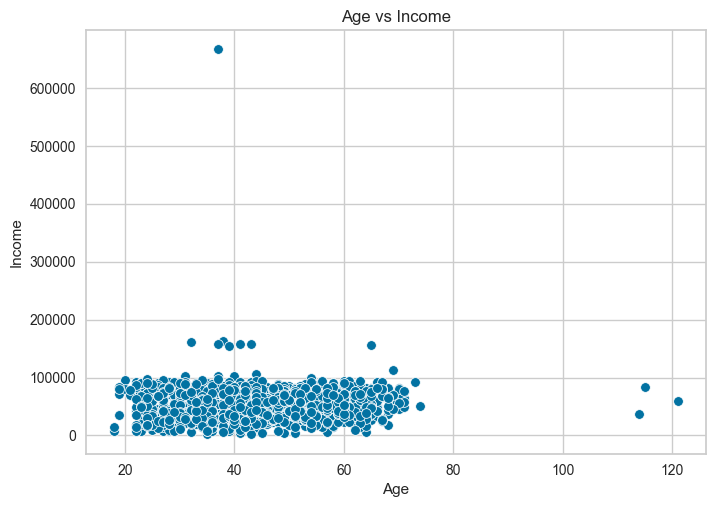

In [10]:
# Xử lý outliers trong Income và Age
sns.scatterplot(x='Age', y='Income', data=df)

# Đặt tên và nhãn
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')

plt.show()

`Nhận xét:` Có các outliers ở trường **Age** và **Income**

In [11]:
# Xử lý outliers
df = df[df['Income'] <= 200000]
df = df[df['Age'] <= 100]
print("Số dòng và cột sau khi loại bỏ outliers:", df.shape)

Số dòng và cột sau khi loại bỏ outliers: (2212, 28)


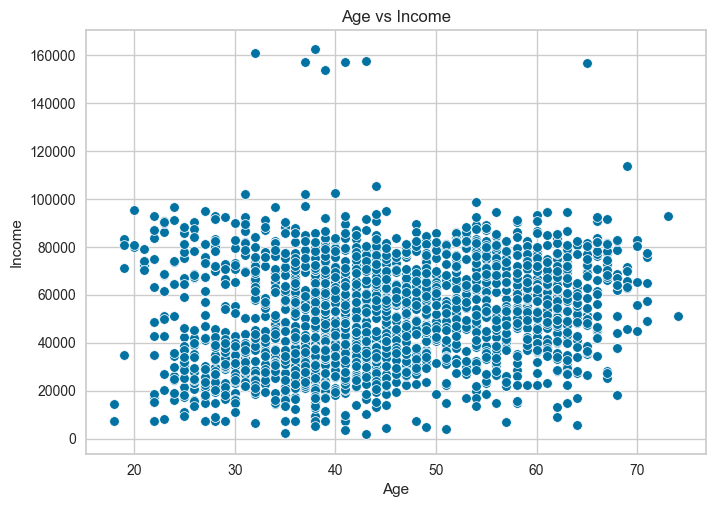

In [12]:
# Dữ liệu sau khi xử lý outliers
sns.scatterplot(x='Age', y='Income', data=df)

# Đặt tên và nhãn
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')

plt.show()

#### 2.2.3 Education

In [13]:
# Cột education
df['Education'].value_counts()

Education
Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: count, dtype: int64

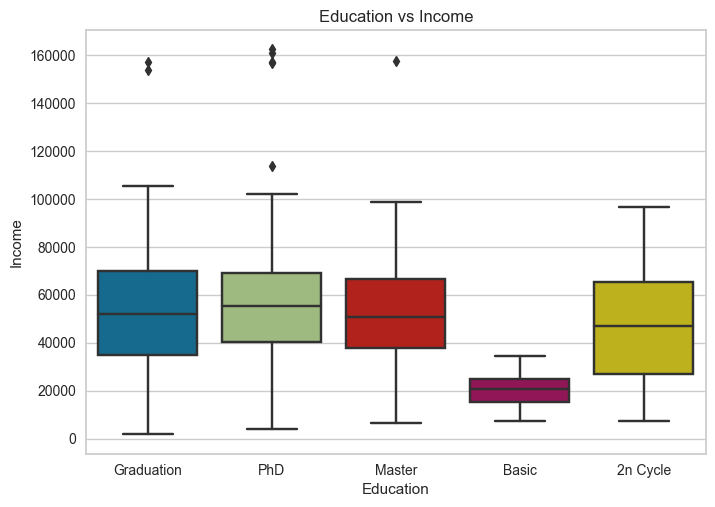

In [14]:
sns.boxplot(x='Education', y='Income', data=df)

# Đặt tên và nhãn
plt.title('Education vs Income')
plt.xlabel('Education')
plt.ylabel('Income')

plt.show()

Có tổng cộng 5 giá trị cho trình độ đại học, để đơn giản thì ta sẽ chia ra thành 2 trình độ: PostGrad và Non-PostGrad

In [15]:
df['PostGrad'] = df['Education'].replace({'Graduation': 0, 'PhD': 1, 'Master': 1, '2n Cycle': 0, 'Basic': 0})
df = df.drop(columns=['Education'])

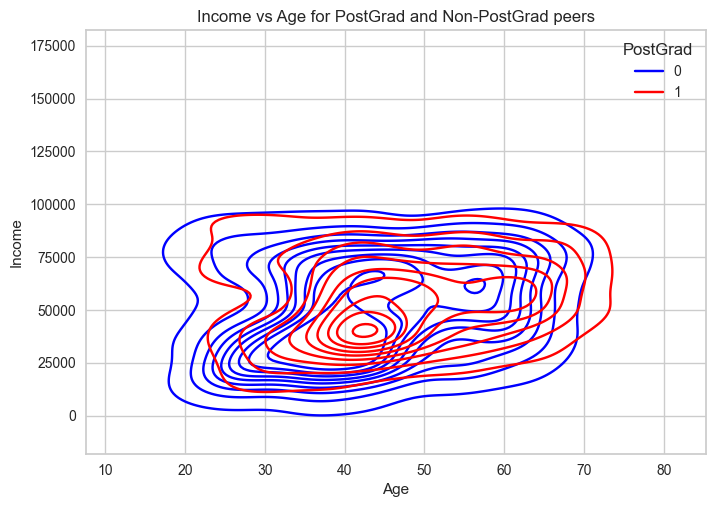

In [16]:
# Create a scatter plot using Seaborn
sns.kdeplot(x='Age', y='Income', hue="PostGrad", data=df, palette={0: 'blue', 1: 'red'})

# Set the title and labels
plt.title('Income vs Age for PostGrad and Non-PostGrad peers')
plt.xlabel('Age')
plt.ylabel('Income')

# Show the plot
plt.show()

#### 2.2.4 Marital_Status

In [17]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Tương tự như trường **Education**, **Marital_Status** cũng là dữ liệu phân loại, để đơn giản chúng ta sẽ mã hóa dữ liệu như sau: <'Together' 'Married' > là 1 và <'Single' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO'> là 0

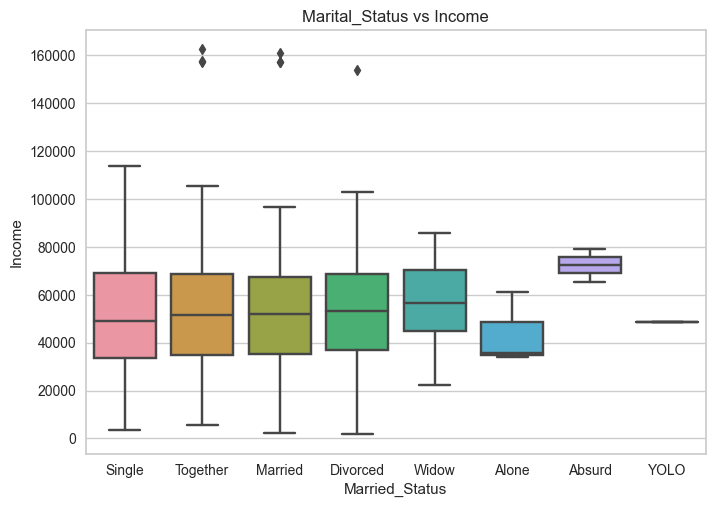

In [18]:
sns.boxplot(x='Marital_Status', y='Income', data=df)

# Đặt tên và nhãn
plt.title('Marital_Status vs Income')
plt.xlabel('Married_Status')
plt.ylabel('Income')

plt.show()

In [19]:
df['Couple'] = df['Marital_Status'].replace({'Single': 0, 'Married': 1, 'Together': 1, 'Divorced': 0, 'Widow': 0, 'Alone': 0, 'Absurd': 0, 'YOLO': 0})

# Xóa cột 'Marital_Status'
df = df.drop(columns=['Marital_Status'])

#### 2.2.5 Kidhome và Teenhome

In [20]:
# Gộp kidhome và teenhome thành một cột mới là offsprings tổng số con cái trong hộ gia đình
df['Offsprings'] = df['Kidhome'] + df['Teenhome']

df = df.drop(columns=['Kidhome', 'Teenhome'])

#### 2.2.6 Dt_Customer

In [21]:
df.head()

,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,PostGrad,Couple,Offsprings
0,58138.0,2012-09-04,58,635,88,546,172,88,88,3,...,0,0,0,3,11,1,57,0,0,0
1,46344.0,2014-03-08,38,11,1,6,2,1,6,2,...,0,0,0,3,11,0,60,0,0,2
2,71613.0,2013-08-21,26,426,49,127,111,21,42,1,...,0,0,0,3,11,0,49,0,1,0
3,26646.0,2014-02-10,26,11,4,20,10,3,5,2,...,0,0,0,3,11,0,30,0,1,1
4,58293.0,2014-01-19,94,173,43,118,46,27,15,5,...,0,0,0,3,11,0,33,1,1,1


In [22]:
# Tạo feature mới tính số ngày một KH đã tham gia vào chương trình của công ty
min_date = df['Dt_Customer'].min()
max_date = df['Dt_Customer'].max()
print("Ngày đầu tiên tham gia:", min_date)
print("Ngày gần đây nhất tham gia:", max_date)

print("Khách hàng đầu tiên đã tham gia được:", (max_date - min_date).days, "ngày")

df['CustomerAge'] = df['Dt_Customer'].apply(lambda x: (max_date - x).days)

df = df.drop(columns=['Dt_Customer'])

df.head()

Ngày đầu tiên tham gia: 2012-07-30 00:00:00
Ngày gần đây nhất tham gia: 2014-06-29 00:00:00
Khách hàng đầu tiên đã tham gia được: 699 ngày


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,PostGrad,Couple,Offsprings,CustomerAge
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,0,3,11,1,57,0,0,0,663
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,0,3,11,0,60,0,0,2,113
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,0,3,11,0,49,0,1,0,312
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,0,3,11,0,30,0,1,1,139
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,0,3,11,0,33,1,1,1,161


#### 2.2.7 MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds

Những cột này mô tả lượng tiền mà khách hàng bỏ ra trong 2 năm qua

In [23]:
Mn_columns = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df[Mn_columns].head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


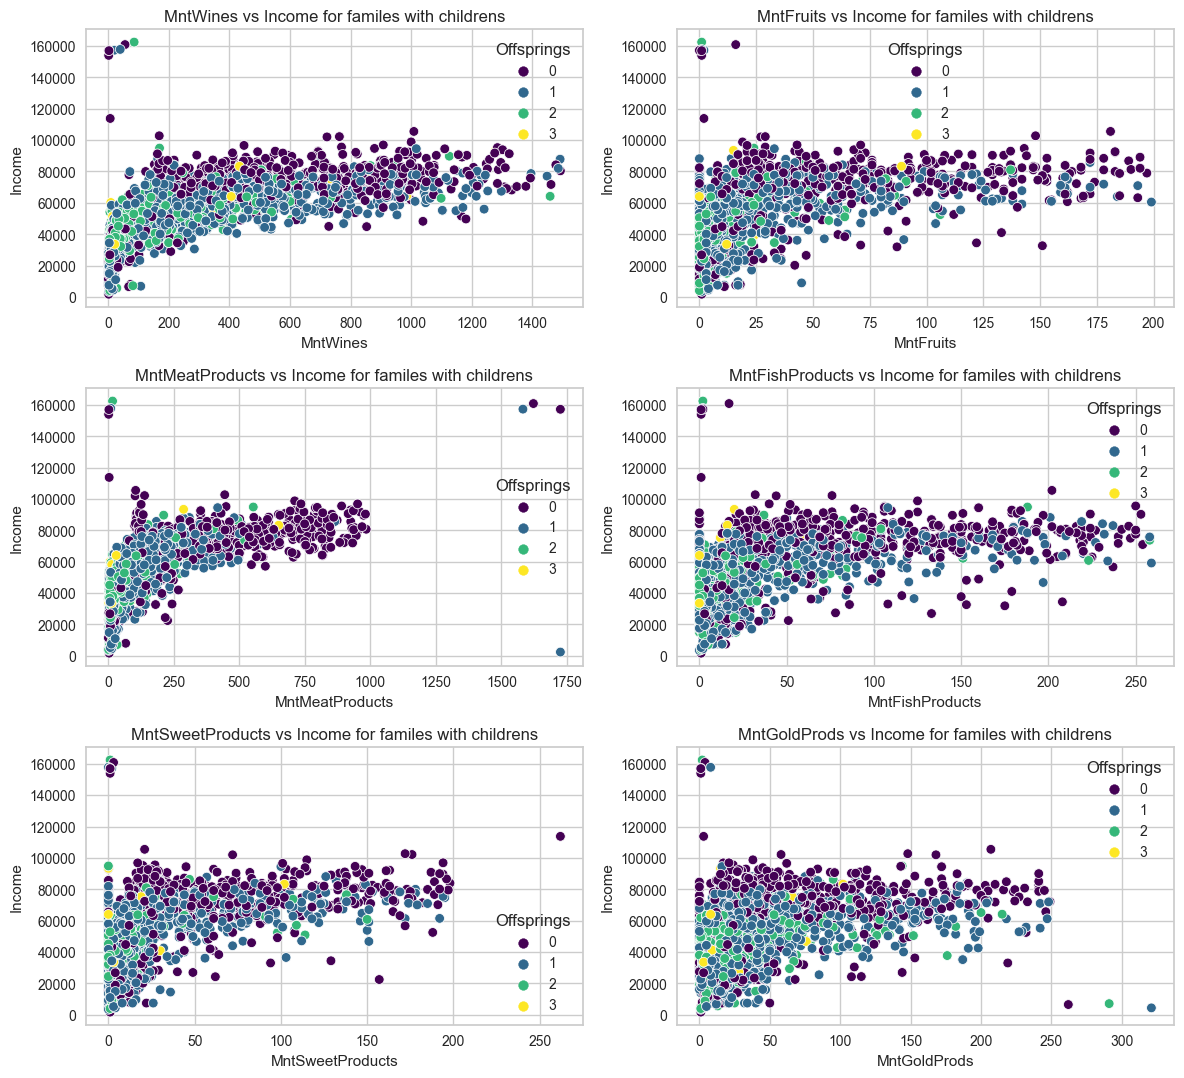

In [39]:
# Figure Settings
plt.subplots(figsize=(12, 50))

# Loop through each column in the list and plot graphs
for i, column in enumerate(df[Mn_columns].columns):
    plt.subplot(len(df.columns)//2 + 1, 2, i+1,)  # Create subplots
    sns.scatterplot(x= column , y='Income', hue="Offsprings", data=df, palette='viridis')
    plt.title(column + " vs Income for familes with childrens")
    plt.tight_layout()

# Show the plot
plt.show()

In [40]:
# Gộp các cột MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds thành một cột mới là AmountSpent

df['AmountSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df = df.drop(columns=Mn_columns)

<Axes: xlabel='AmountSpent', ylabel='Income'>

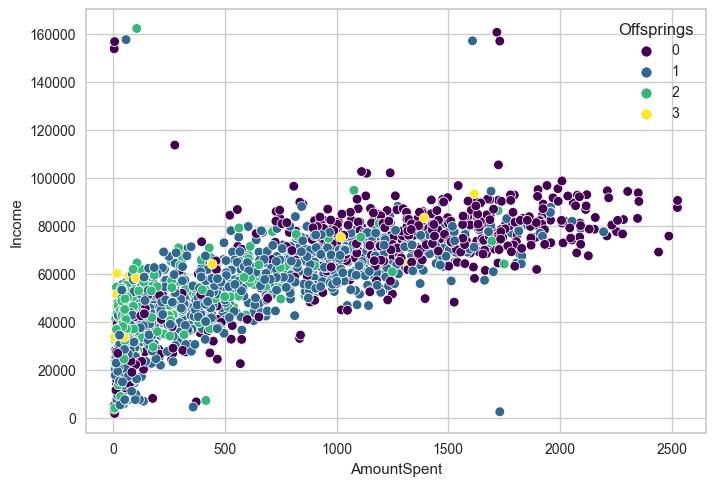

In [49]:
sns.scatterplot(x='AmountSpent', y='Income', hue='Offsprings', data=df, palette='viridis')

#### 2.2.8 Bỏ các cột không sử dụng

- 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5' : Các cột này mô tả chiến dịch mà KH chấp nhận voucher, không có ý nghĩa khi phân cụm
- 'Z_Revenue', 'Z_CostContact' : Không có dữ liệu thực
- 'Complain', 'Response' : Các cột này cũng không có ý nghĩa khi phân cụm

In [52]:
columnList = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Z_Revenue', 'Z_CostContact', 'Complain']

df = df.drop(columns=columnList)

### 2.3 Ma trận tương quan

<Axes: >

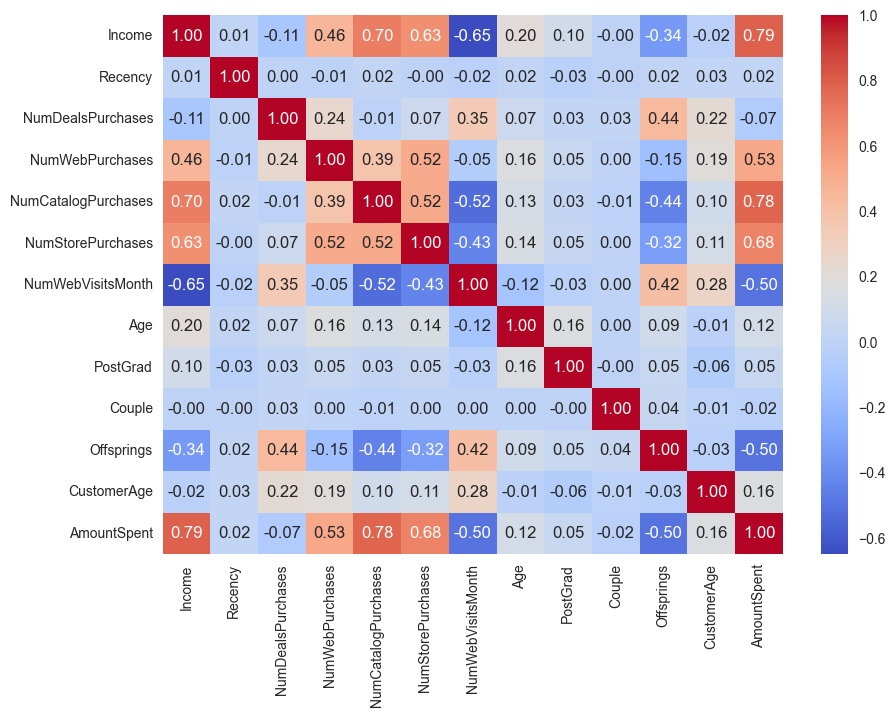

In [70]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

### 2.4 Feature Scaling (chuẩn hóa các đặc trưng)

<Axes: >

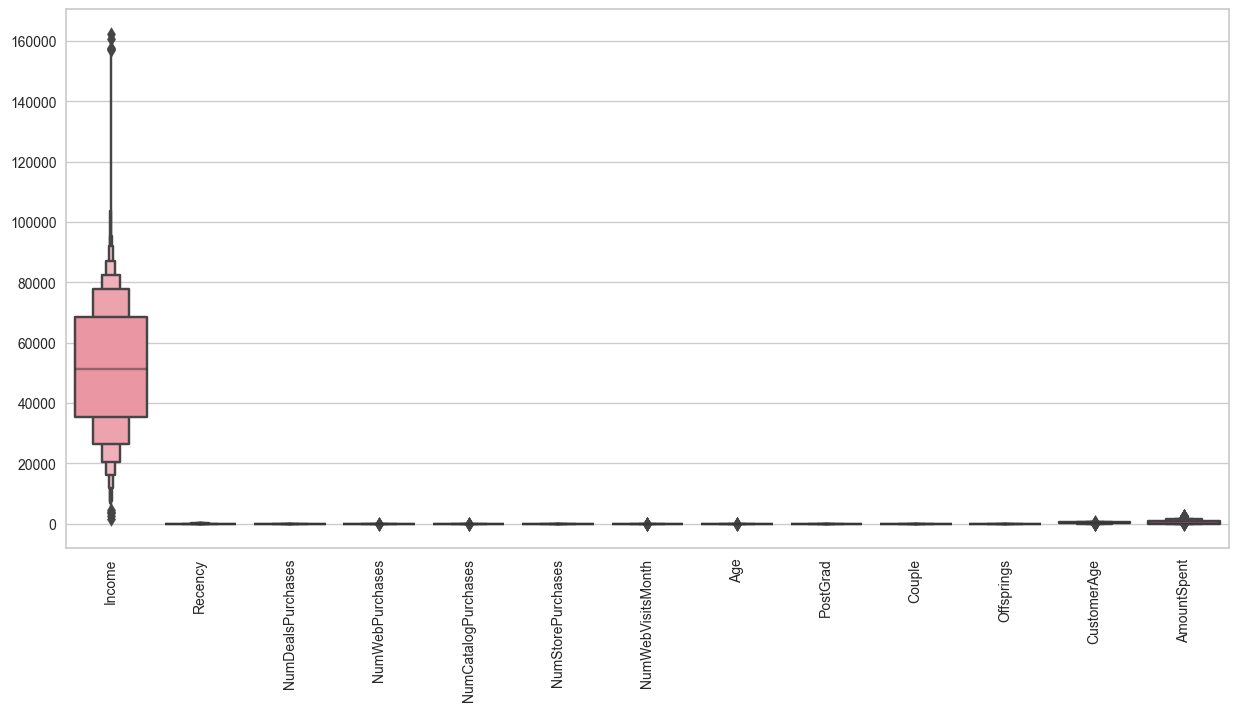

In [81]:
# Vẽ biểu đồ boxplot cho các feature
plt.figure(figsize=(15, 7))
plt.xticks(rotation=90)
sns.boxenplot(data=df)

In [83]:
# Chuẩn hóa dữ liệu các cột
StdScl = StandardScaler()
scaledX = StdScl.fit_transform(df)
scaledX = pd.DataFrame(scaledX, columns=list(df.columns))

<Axes: >

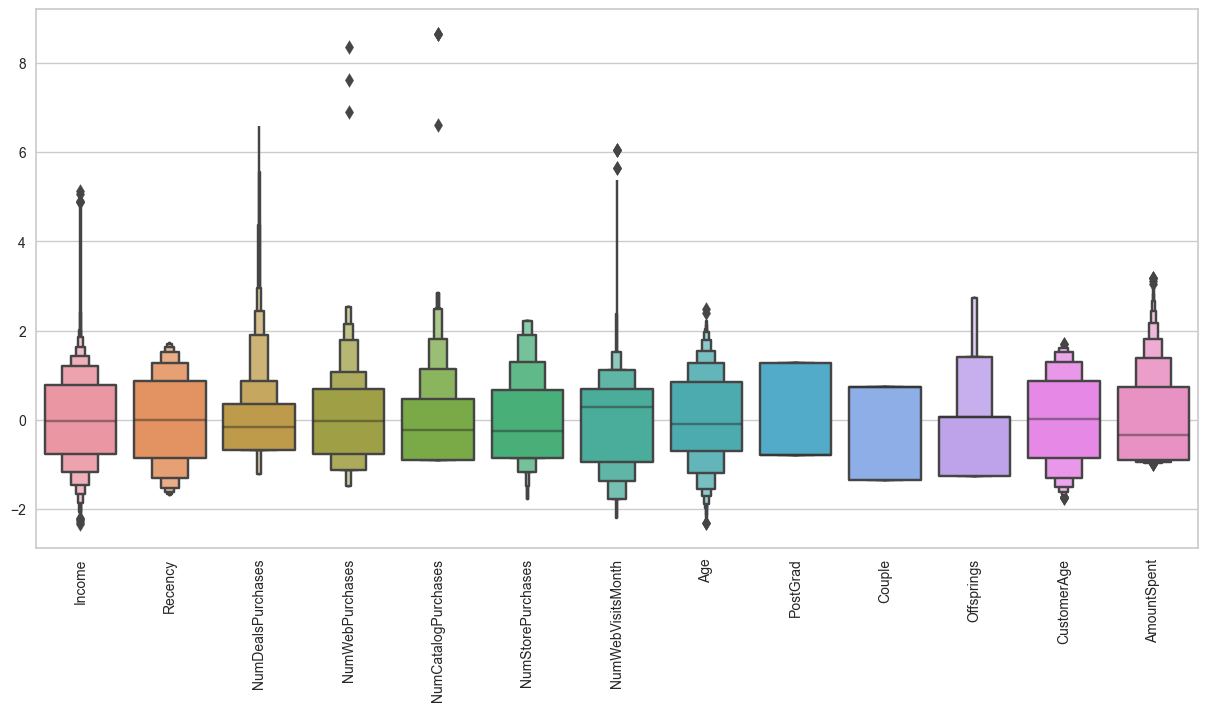

In [85]:
# Vẽ biểu đồ boxplot cho các feature
plt.figure(figsize=(15, 7))
plt.xticks(rotation=90)
sns.boxenplot(data=scaledX)

In [87]:
scaledX.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,PostGrad,Couple,Offsprings,CustomerAge,AmountSpent
0,0.287105,0.310353,0.351030,1.426865,2.503607,-0.555814,0.692181,1.018352,-0.786220,-1.349603,-1.264598,1.527721,1.676245
1,-0.260882,-0.380813,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-0.786220,-1.349603,1.404572,-1.189011,-0.963297
2,0.913196,-0.795514,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.334530,-0.786220,0.740959,-1.264598,-0.206048,0.280110
3,-1.176114,-0.795514,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,-0.786220,0.740959,0.069987,-1.060584,-0.920135
4,0.294307,1.554453,1.390492,0.332600,0.111982,0.059532,-0.132545,-1.033114,1.271909,0.740959,0.069987,-0.951915,-0.307562


## 3, Train mô hình

### 3.1 Giới thiệu thuật toán K-Means
- **K-Means** là thuật toán học máy không giám sát (tức là chưa biến nhãn đầu ra), thường được sử dụng khi muốn phân các điểm dữ liệu có sự tương đồng với nhau vào thành các cụm. Đây là thuật toán rất đơn giản và được sử dụng phổ biến rộng rãi, nó phân các điểm dữ liệu đầu vào thành **K cụm** (K được xác định trước). 
- **WCSS** viết tắt cho *Within-Cluster Sum of Squares* - là thước đo để đánh giá chất lượng của việc phân cụm. **WCSS** đo lường mức độ gần gũi hoặc chặt chẽ của các cụm bằng cách tính tổng bình phương khoảng cách giữa mỗi điểm dữ liệu và trọng tâm được gán của nó trong từng cụm.
- Mục tiêu của thuật toán là tối thiểu đại lượng **WCSS**. Giá trị **WCSS** nhỏ hơn tức là các điểm dữ liệu gần với trung tâm cụm của nó thuộc về hơn, dẫn đến các cụm gần gũi và tách biệt tốt hơn. Một cách để tối thiểu hóa đại lượng **WCSS** là chọn K (số cụm) sao cho **WCSS** giảm mà không dẫn đến overfitting.

### 3.1 Phương pháp chọn số K

**Phương pháp sử dụng:** `Elbow (khuỷu tay)`

In [128]:
# Tính WCSS khi số cụm là 1 đến 10
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++')
  kmeans.fit(scaledX)
  wcss.append(kmeans.inertia_)

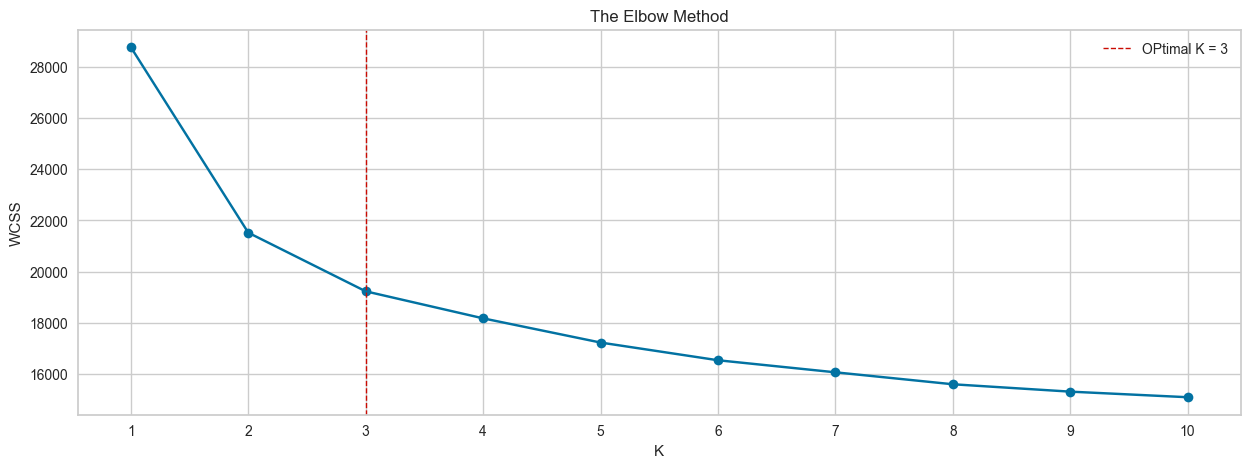

In [129]:
plt.figure(figsize=(15,5))

plt.xticks(np.arange(1,11,1))
plt.plot(range(1,11), wcss, marker='o', linestyle='-')

plt.title("The Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS")

plt.axvline(x=3, color='r', linestyle='--', linewidth=1, label='OPtimal K = 3')
plt.legend()

plt.show()

`Nhận xét:` Có thể thấy số cụm tối ưu là K = 3

- `Silhouette Score`: tính toán độ tương đồng của một điểm dữ liệu đối với cụm mà nó thuộc và độ khác biệt của nó so với các cụm khác.
- Giá trị silhouette score có thể nằm trong khoảng từ **-1 đến 1**. Một silhouette score gần 1 cho biết dữ liệu được phân chia tốt, trong khi một silhouette score gần -1 cho biết dữ liệu được phân chia không tốt. Nếu silhouette score gần 0, điều đó chỉ ra rằng các cụm có sự chồng chéo.

In [132]:
silhouette_scores = []

# Tính silhouette score cho mỗi số cụm từ 2 đến K_max
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaledX)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaledX, labels)
    silhouette_scores.append(silhouette_avg)

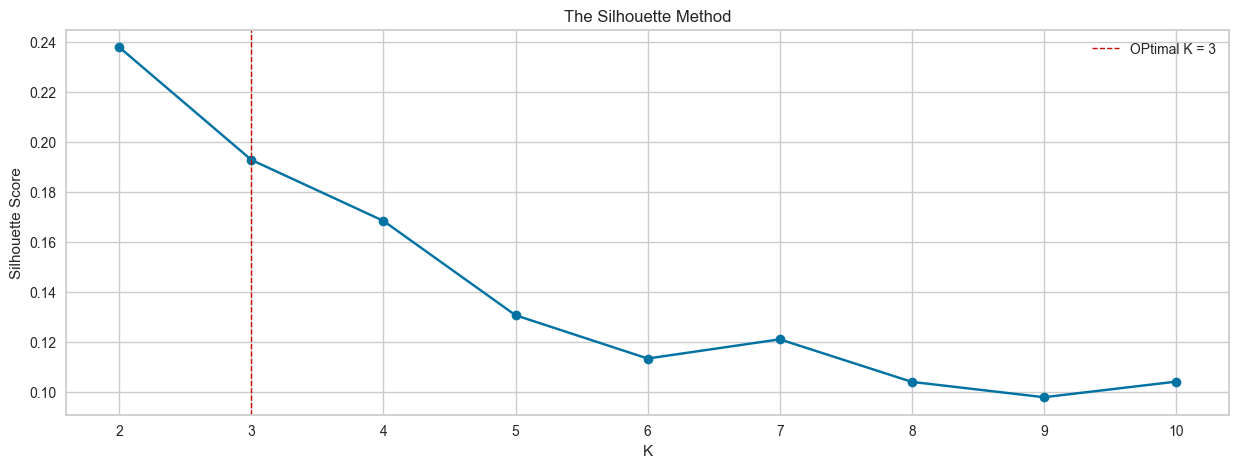

In [133]:
plt.figure(figsize=(15,5))

plt.xticks(np.arange(2,11,1))
plt.plot(range(2,11), silhouette_scores, marker='o', linestyle='-')

plt.title("The Silhouette Method")
plt.xlabel("K")
plt.ylabel("Silhouette Score")

plt.axvline(x=3, color='r', linestyle='--', linewidth=1, label='OPtimal K = 3')
plt.legend()

plt.show()

## 4, Huấn luyện mô hình và thực hiện phân cụm

In [144]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(scaledX)
Cluster = kmeans.labels_

In [145]:
df['Cluster'] = Cluster

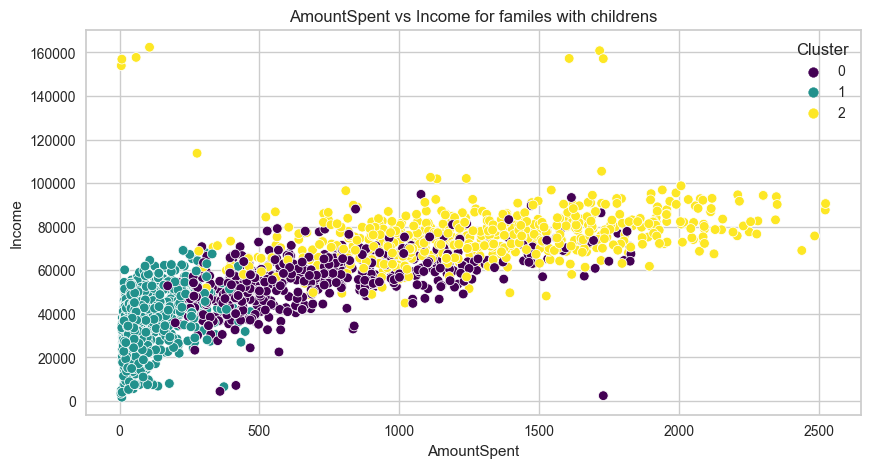

In [146]:
# Figure settings
plt.figure(figsize=(10,5))

# Create a scatter plot using Seaborn
sns.scatterplot(x='AmountSpent', y='Income', hue="Cluster", data=df, palette='viridis')

# Set the title and labels
plt.title('AmountSpent vs Income for familes with childrens')
plt.xlabel('AmountSpent')
plt.ylabel('Income')

# Show the plot
plt.show()

`Nhận xét:` chúng ta thấy rằng có 3 cụm
1. Nhóm thu nhập thấp, chi tiêu thấp
2. Nhóm thu nhập trung bình, chi tiêu trung bình
3. Nhóm thu nhập cao, chi tiêu cao

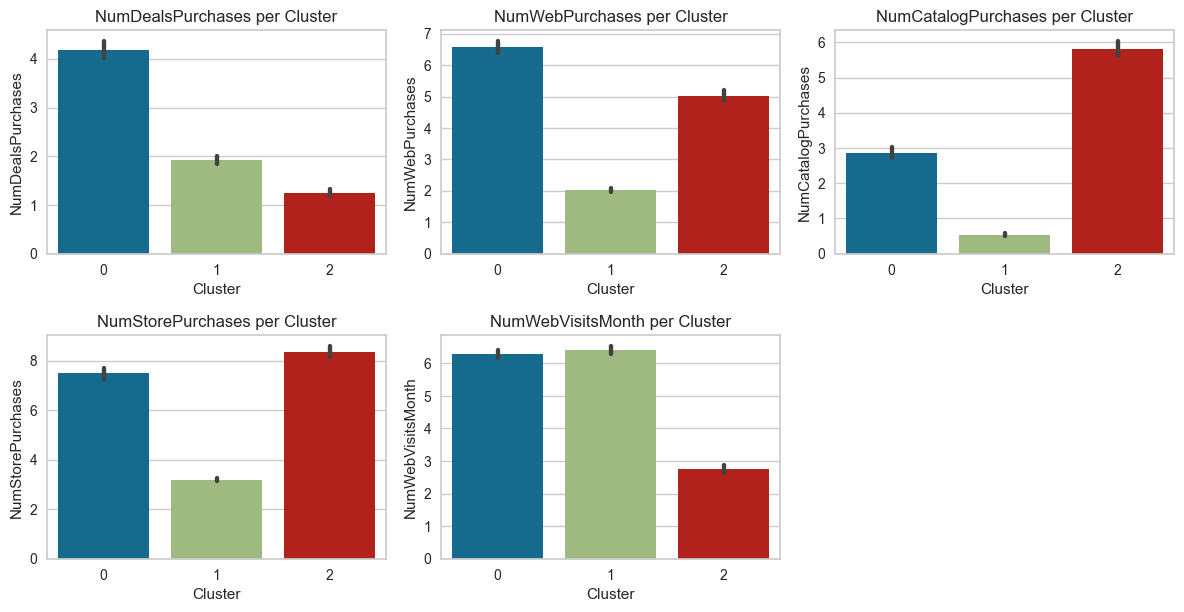

In [158]:
columnList = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

plt.figure(figsize=(12, 15))

for i, column in enumerate(columnList):
    plt.subplot(len(df.columns)//3 + 1, 3, i+1,)  # Create subplots
    sns.barplot(x='Cluster', y=column, data=df)
    plt.title(column + " per Cluster")
    plt.tight_layout()
plt.show()